In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data set by uploading
from google.colab import files
uploaded = files.upload()

Saving mushroom.csv to mushroom (7).csv


In [3]:
#Reading the data set using pandas
df = pd.read_csv('mushroom.csv')

In [4]:
#Overview of the data set
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
#Overview of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

### **Overview of the data set**

**=> <u>Structure</u>**
The mushroom data set consists of 2000 readings/entries and 26 columns .the mushroom data set describe about mushroom characheristics such as shape,color,type,size and odour ,etc.of different aspects of each mushroom like cap,gill,stalk,veil,ring etc and the target variable seems like to be class of the mushroom.

**=> <u>Contents</u>**

- column "unnamed:0(Int)" an unique identification number of the data set which is to identify each reading as different from each other.
- There are 4 columns(object) that describes about cap which is at the top of the mushroom such as surface,colour,shape,and it's diameter.
- Bruise and odor describes whether mushrooms have the bruise or not and what type of odor it has.
- Mushrooms has gills(4 columns - object) like structure under it's cap and gills has size,color,space and attachment types.
- Every mushroom has stalk(7 columns - 6 object and 1 float ) which is like a trunk of the tree that is spruts from the roots it has different types of shape,root,surface above ring ,below ring,color above ring and below and height of the stalk.
- veil(2 column - objects) is a membrane that covers cap and stalk(sometimes) veils has types and colors.
- most mushrooms stalk has ring(2 columns - object)like structures and these rings has types sometimes has more rings.
- some other columns that describes that spore print color,population and it habitat conditions(3 columns- objects).
- Finally class(object) that defines whether it is poisonous or edible.this is most likely to be target variable.

## **Exploration Data Analysis**

### **Descriptive Statistics**

In [6]:
#Statistical Summary of the data set
basic_stats =df.describe(include=["float64","int64","object"])
skewness= df.skew(numeric_only=True)
kurtosis= df.kurtosis(numeric_only=True)

dist_stats = pd.DataFrame({'skewness':skewness,'kurtosis': kurtosis }).T #Creating data frame for feasible analysis

#Displaying the stats as whole table
stats_table=pd.concat([basic_stats,dist_stats])

stats_table

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,2,7,4,4,9,9,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,bulbous,fibrous,silky,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,1040,336,555,522,271,259,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


### **Data Visualization**

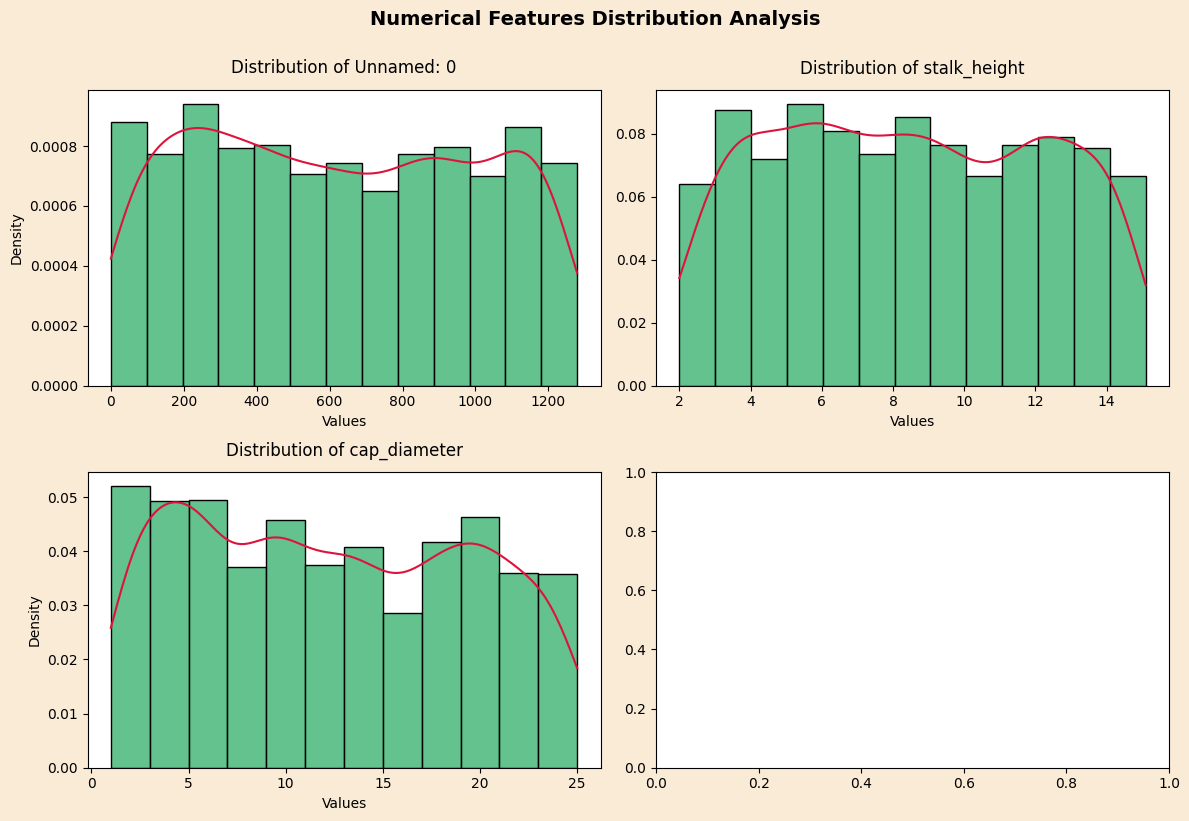

In [7]:
#Histogram of numerical columns
numerical_cols = df.select_dtypes(include = ["int64","float64"]).columns

n_cols =2
n_rows = 2
kde_color = 'crimson'
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),facecolor="antiquewhite")
axes = axes.flatten()

for i,col in enumerate(numerical_cols):
  sns.histplot(data=df,x=col,ax=axes[i],kde =True,color = "mediumseagreen",edgecolor ="black",alpha= 0.8,stat="density")
  axes[i].set_title(f'Distribution of {col}', fontsize=12, pad=12)
  axes[i].set_xlabel('Values', fontsize=10)
  axes[i].set_ylabel('Density' if i%n_cols==0 else '', fontsize=10)
  axes[i].lines[0].set_color(kde_color)


plt.tight_layout()
plt.suptitle('Numerical Features Distribution Analysis',y=1.02,fontsize = 14,weight = 'bold')
plt.subplots_adjust(top = 0.92)
plt.show()

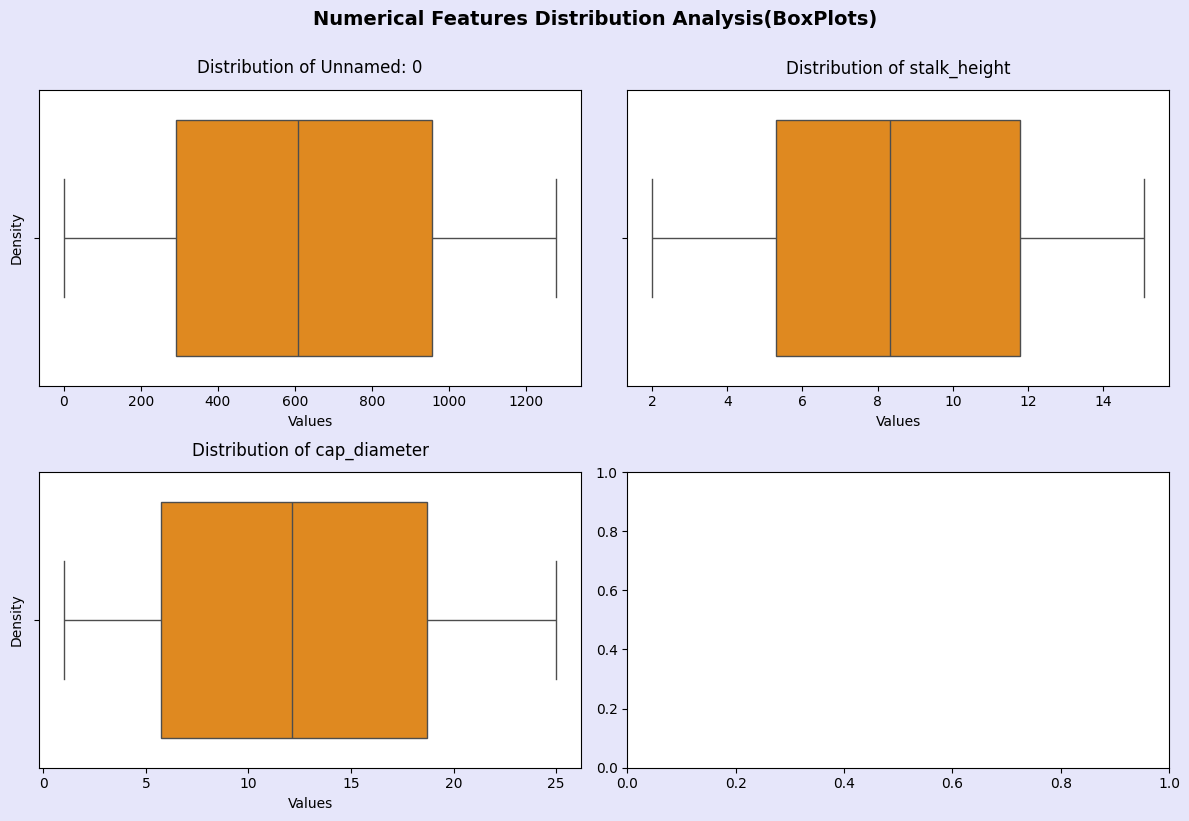

In [8]:
#Boxplots for numerical columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),facecolor="lavender")
axes = axes.flatten()

for i,col in enumerate(numerical_cols):
  sns.boxplot(data=df,x=col,ax=axes[i],color ="darkorange")
  axes[i].set_title(f'Distribution of {col}', fontsize=12, pad=12)
  axes[i].set_xlabel('Values', fontsize=10)
  axes[i].set_ylabel('Density' if i%n_cols==0 else '', fontsize=10)

plt.tight_layout()
plt.suptitle('Numerical Features Distribution Analysis(BoxPlots)',y=1.02,fontsize = 14,weight = 'bold')
plt.subplots_adjust(top = 0.92)
plt.show()

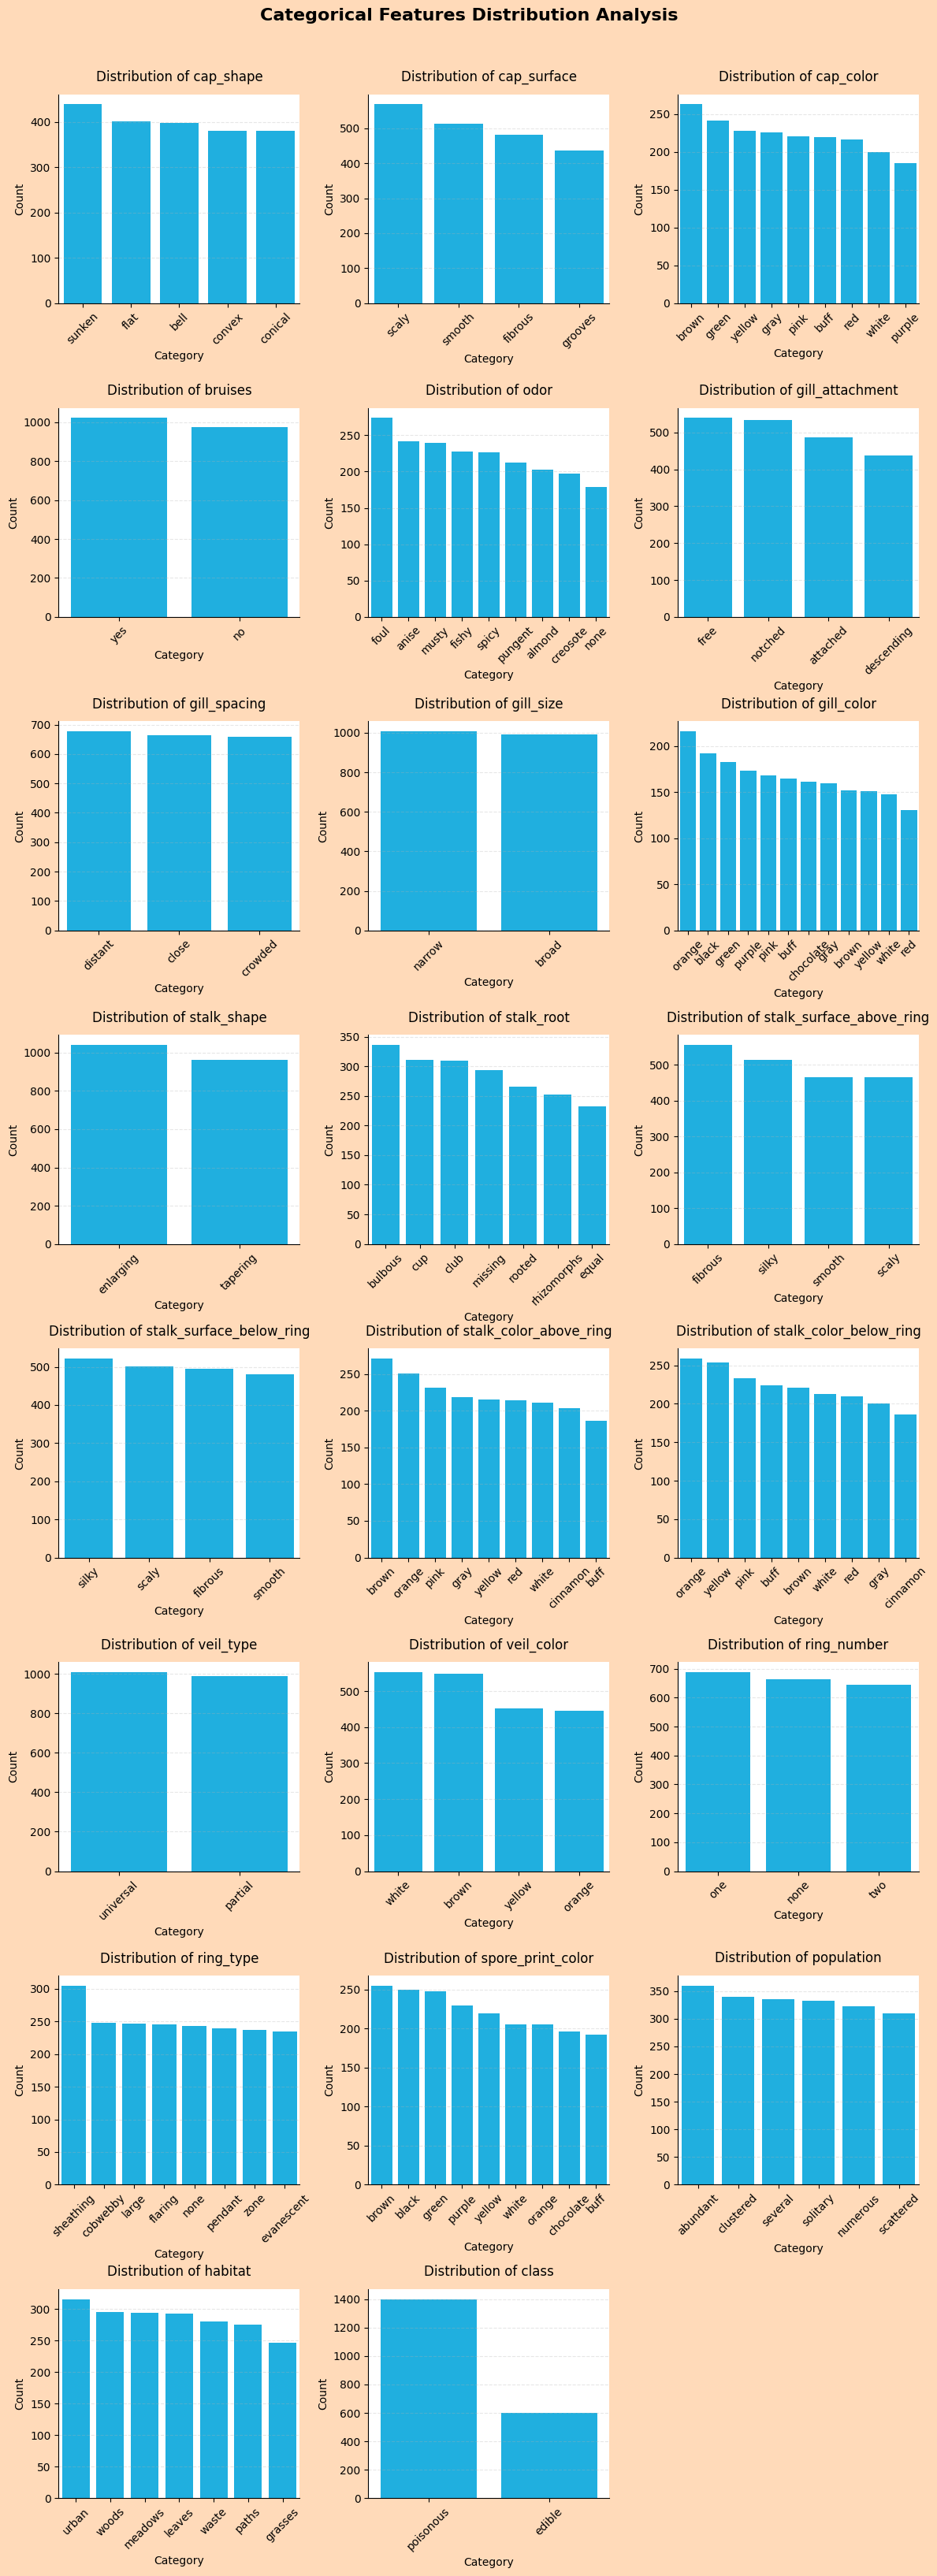

In [9]:
#Visualization of categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

fig, axes = plt.subplots(nrows=8, ncols=3,figsize=(12,32),facecolor="peachpuff")

axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i], color='deepskyblue',order=df[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, pad=12)
        axes[i].set_xlabel('Category', fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', alpha=0.3, linestyle='--')
        axes[i].spines[['right', 'top']].set_visible(False)

#Hiding empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

#Final layout adjustments
plt.tight_layout()
plt.suptitle('Categorical Features Distribution Analysis',y=1.02,fontsize=16,weight='bold')
plt.subplots_adjust(hspace=0.5)  #Extra spacing between rows
plt.show()

<Figure size 800x600 with 0 Axes>

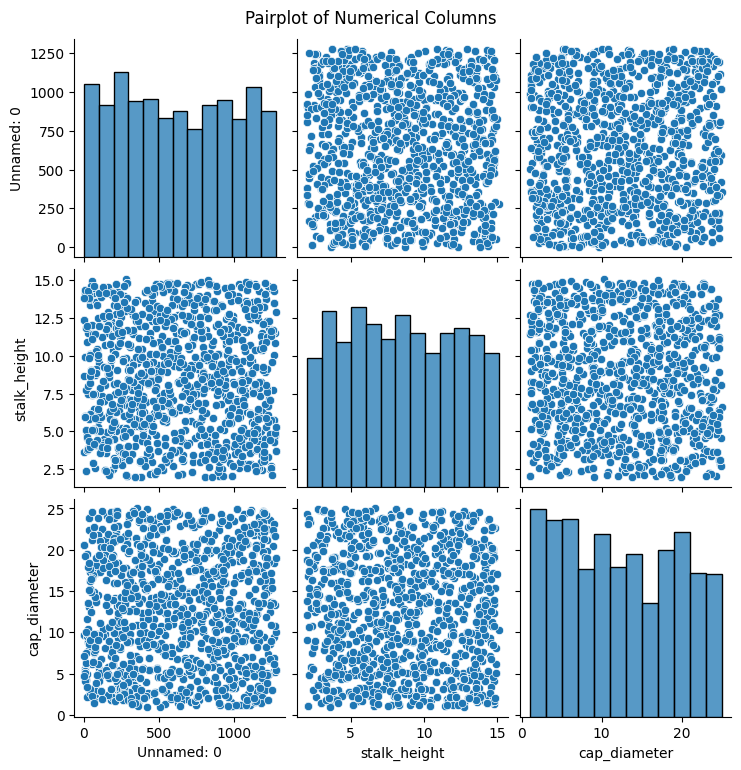

In [10]:
#Creating scatter plots between age and numerical columns
plt.figure(figsize=(8, 6))
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

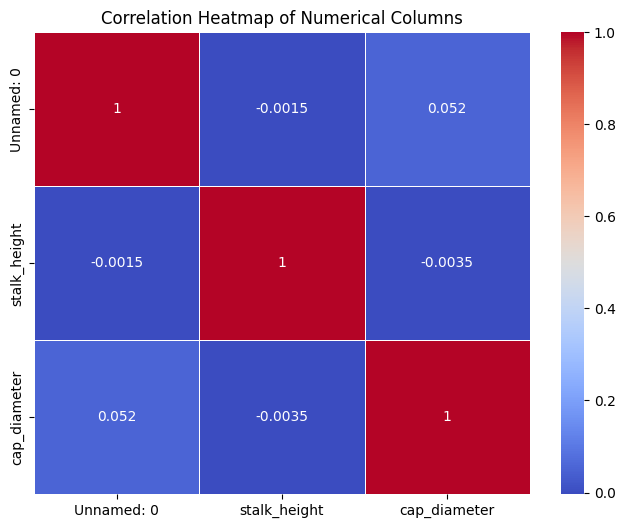

In [11]:
#Correlation heatmap of the dataset
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

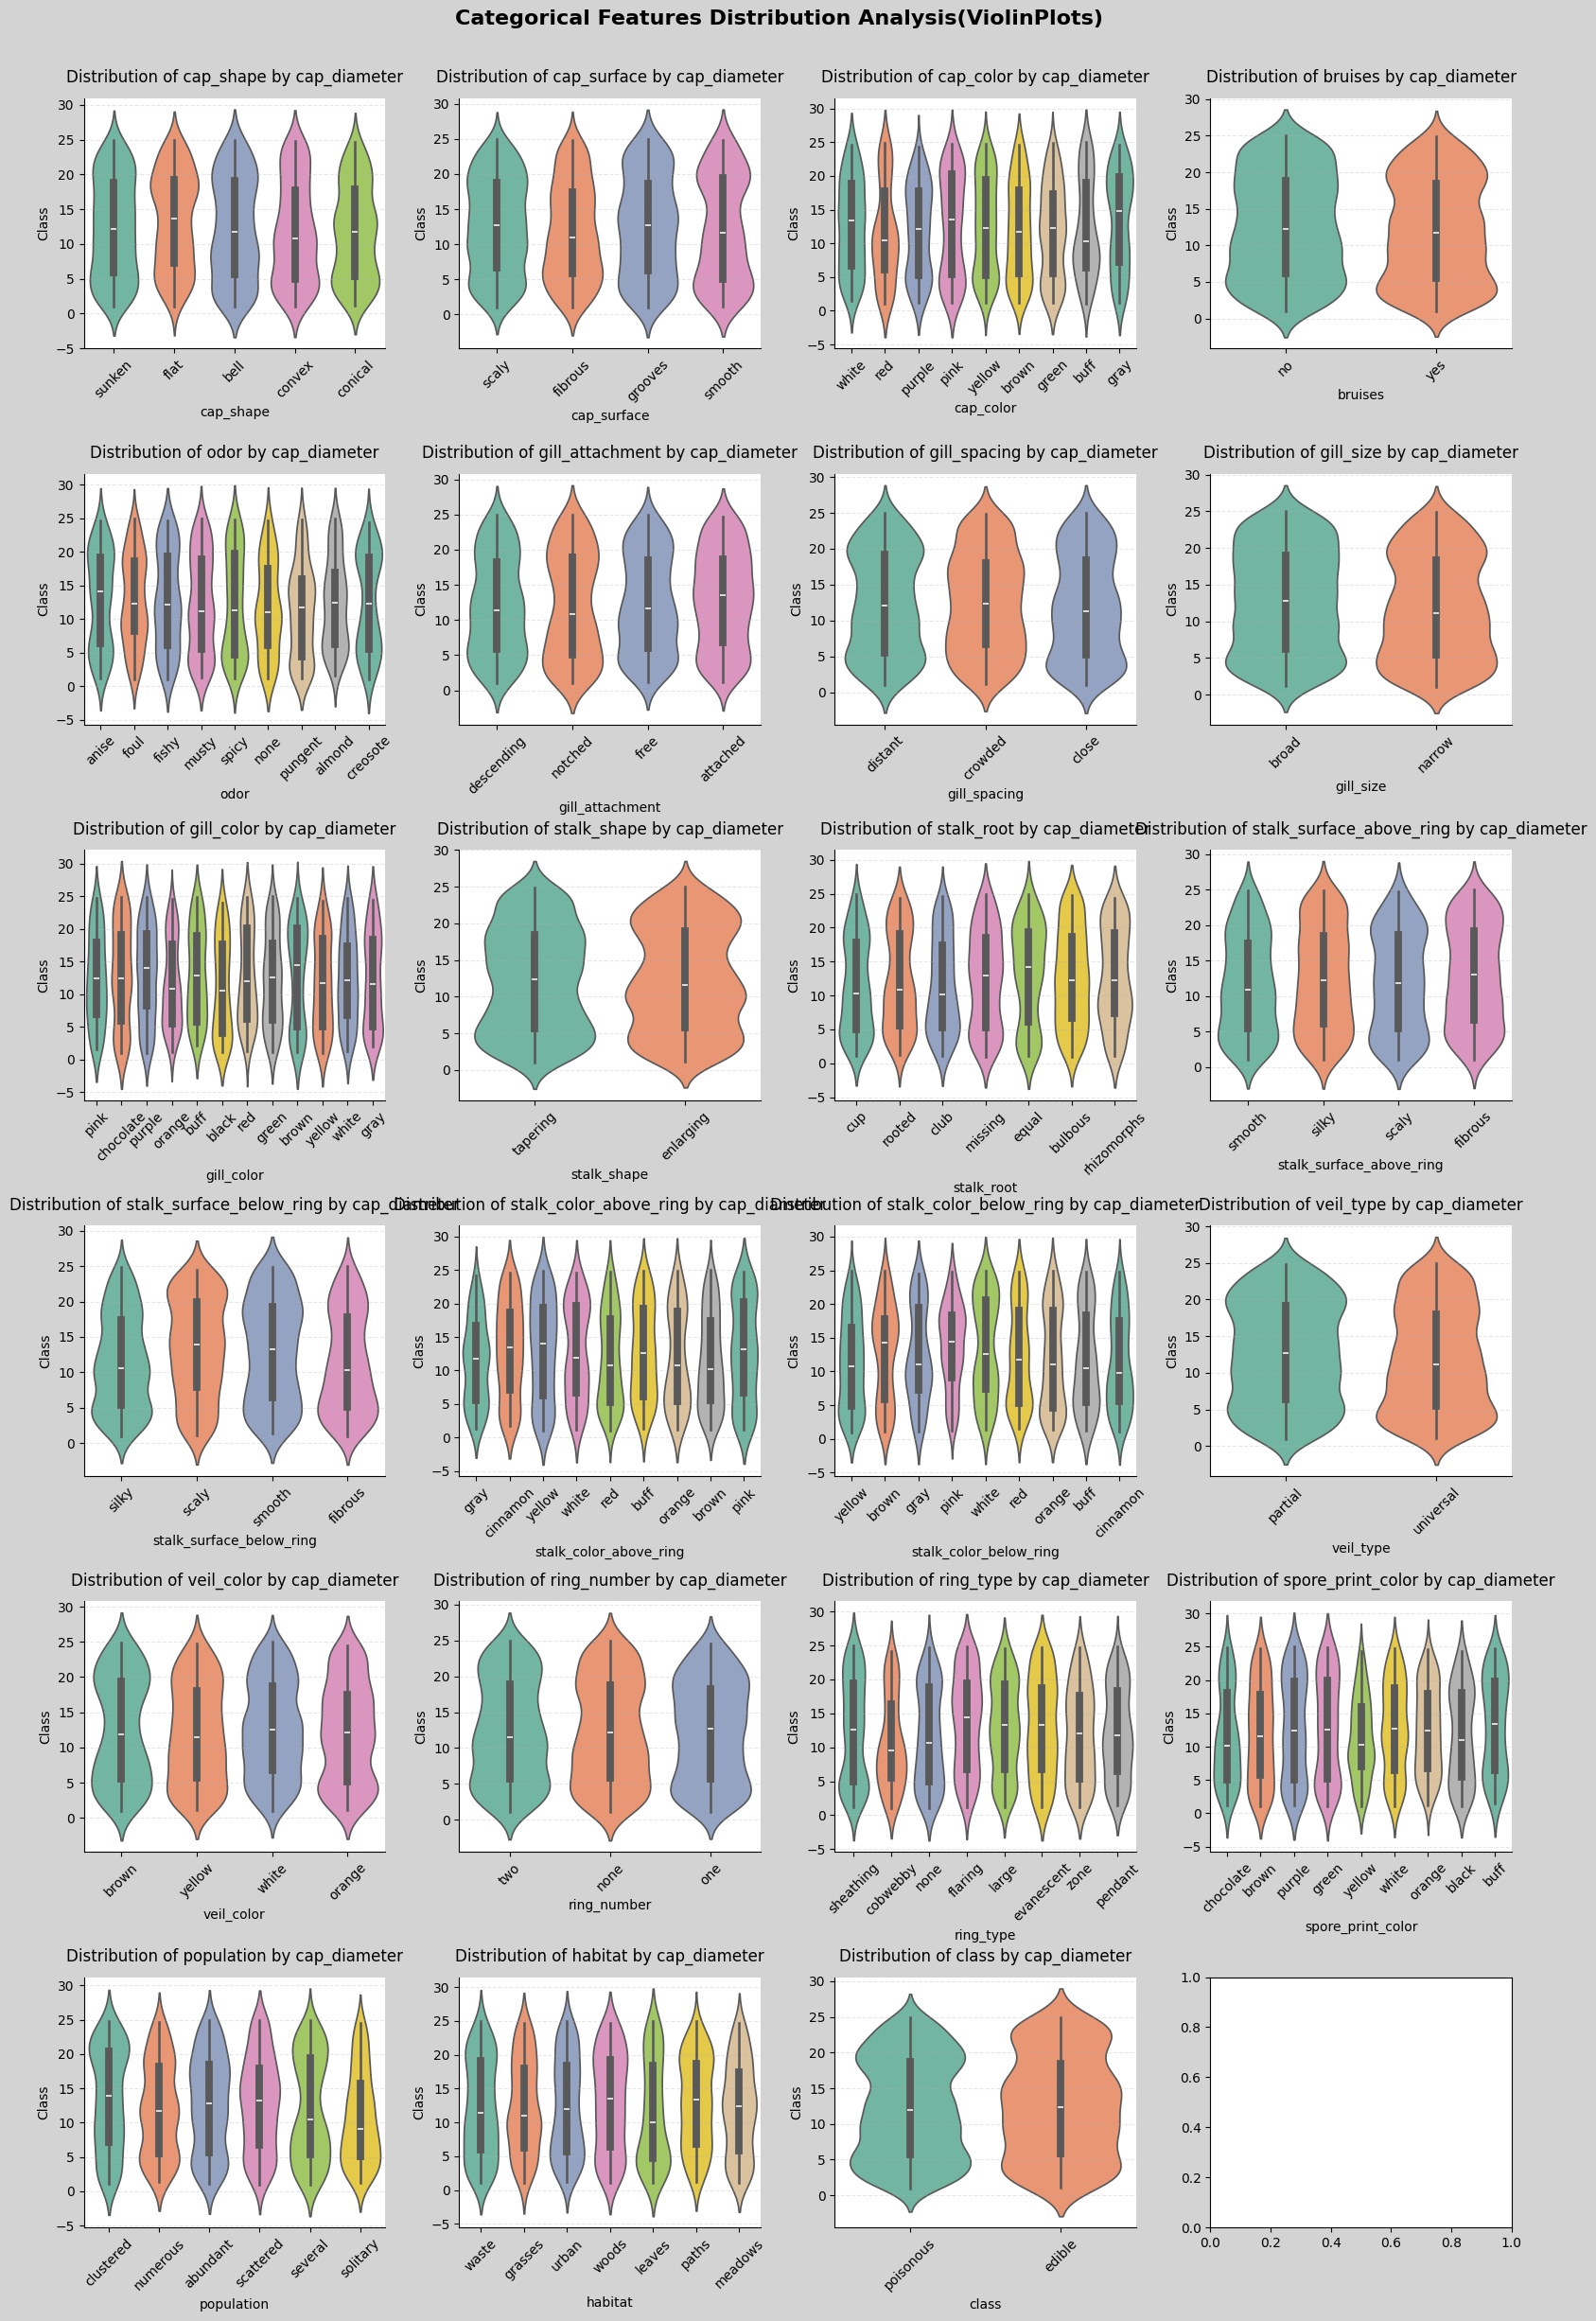

In [12]:
#Violinplots of the categorical columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 24), facecolor="lightgray")
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.violinplot(data=df, x=col, y='cap_diameter',hue = col, ax=axes[i], palette='Set2',legend = False)
        axes[i].set_title(f'Distribution of {col} by cap_diameter', fontsize=12, pad=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Class', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', alpha=0.3, linestyle='--')
        axes[i].spines[['right', 'top']].set_visible(False)


plt.tight_layout()
plt.suptitle('Categorical Features Distribution Analysis(ViolinPlots)', y=1.02, fontsize=16, weight='bold')
plt.subplots_adjust(hspace=0.5)
plt.show()

### **Insights And Patterns**

**=> <u>From Histograms & Boxplots(Numerical Data)</u>**
- Unnamed: 0 - CThis columns appears to be an index(Unique identification) column with a uniform distribution. It is not useful for analysis.
- stalk_height of mushroom- The distribution is fairly uniform with slight peaks, indicating that mushrooms have a wide range of stalk heights.
- cap_diameter - The distribution is right-skewed, meaning most mushrooms have a smaller cap diameter, but a few have significantly larger caps.
- No Major Outliers - The boxplots do not show extreme outliers, meaning the data is fairly consistent.
- Cap Diameter - The spread suggests variations in mushroom cap sizes, which may be an important distinguishing feature.
- The variation in both(Cap Diameter & Stalk Height) suggests a possible relationship with species classification.
- Working on classification (such as edible vs. poisonous), cap diameter and stalk height might be useful features.

**=> <u>From Pairplot</u>**

No clear patterns or relationships:

- Scatter plots between numerical variables appear to shows some random distributions, suggesting weak or no correlation between features.
- This aligns with the correlation heatmap, where correlation values are close to 0.

Possible uniform or random distributions:

- The above histogram plots suggest that the numerical variables might follow a some what nearly uniform or random distribution without clear skewness.
This could indicate that these numerical features may not have strong predictive power in distinguishing different classes.


**=> <u>From Correlation Heatmap</u>**

Weak correlations:

- The correlation coefficients between all numerical variables are close to zero.
- And the highest correlation (0.052) is between Unnamed: 0 and cap_diameter, which is still negligible since unnamed is index cloumn.
- This means that these numerical features are likely independent of each other.
- Since the numerical variables are weakly correlated, they may not significantly contribute to the classification model's predictive power.
- Checking categorical variables and explore feature interactions, polynomial features, or additional transformations.
- Removing Unnamed: 0 since it's just an index column this might be a good preprocessing step.


**=> <u>From Bar/Count-plots & Violin-plots</u>** **=> <u></u>**

General Distribution Patterns
- The dataset contains a variety of categorical features that describe mushroom characteristics, each with multiple unique values that differentiates whether it is a poisonous or edible.
- Some features have a nearly uniform distribution such as cap_shape, cap_surface, while others are highly skewed for instance odor, stalk_root.

Poisonous vs. Edible Class Distribution
- The poisonous class is significantly higher in count compared to edible mushrooms as of naturally most of the mushrooms are not poisonous.
- This imbalance suggests that identifying key characteristics distinguishing poisonous and edible mushrooms is crucial.

Odor as a Strong Discriminative Feature
- The odor feature has a wide range of categories, with some odors appearing significantly more than others.
- Certain odors may be strong indicators of poisonous mushrooms.
 - Edible mushrooms tend to have pleasent odor while poisonous have bad odor

Stalk and Gill Features Show Variation
- Features like stalk_surface, gill_attachment, gill_spacing, and gill_size or gill_color exhibit different distributions, suggesting these characteristics might contribute to class distinction .
- The stalk_root feature is particularly varied, indicating different growth patterns.
- Most edible mushrooms have colored gills,If mushrooms gills are white means they are poisonous.

Ring and Veil Types
- Most mushrooms have a universal veil type.
- Ring also known as skirt types show variability, with some types being more common.mushrooms with 2 or more rings tend to be poisonous

Cap Diameter Distribution (From Violin Plots)

- The cap diameter varies significantly across different categorical features.
Some features, like cap shape and stalk shape, exhibit distinct cap diameter distributions.
- This suggests that cap diameter could be a key factor in differentiating species.

Habitat and Population Impact
- The habitat feature is diverse, with mushrooms appearing in woods, meadows, and grassy areas.
- Mostly edible mushrooms habitat as clusters such as oyster mushrooms, hen of the woods and certait puffball varities.
Population distribution is fairly uniform, except for a slight dominance in certain environments.

> **Main feature in identifying mushroom type**

- Odor appears to be one of the most discriminative features in differentiating poisonous from edible mushrooms.
 -Pleasent smell means edible and bad smell are poisonous  
- Cap and stalk-related features show variability, indicating their importance in classification.
 - Caps are one of the most crucial feature that helps identify mushrooms which are known as death caps and its color
- Environmental factors (habitat, population) may also contribute to distinguishing mushrooms.
- Further analysis with feature importance and classification modeling can help confirm these patterns.

> **Other Important Features**

Some the other characteristics that helps identify mushrooms whether they are edible or not
 - Scratch test : When you make a scratch on the cap of the mushroom if there's a yellow stain that means they are poisonous
 - volvo size compared to stalk of the mushroom thin stalk large volvo means deadly if volvo is same or no volvo means edible.
 - Cutting test : most poisonous mushrooms turns green or purple after cutting while edibles do not change color because most toxins in mushrooms react with air.
 - Taste test : edible mushrooms doesnot burn or taste bitter if they are taste like that they are bad ,since some animals cannot differentiate taste and immune to their digestive system they tend to eat
 - Cap scales : one of the main features that can be helpful to easily identify mushrooms is scales if mushroom caps have scales they are poisonous if not they are edible
 - Morels : morels help identify mushrooms some poisonous mushrooms has false morels which are different from edible mushrooms morels are like honey comb like structure.

## **Data Preprocessing**

In [13]:
#Dropping unncessary columns
df.drop(columns=["Unnamed: 0"],inplace=True)

### **Handling Missing Values**

In [14]:
#Ensuring there are no missing values in the data set
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


### **Encoding Categorical Columns**

In [15]:
#Mapping the target varible "Class" as poisonous =1 ; edible = 0
df["class"] = df["class"].map({"poisonous":1,"edible":0})

In [16]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,1,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,0,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,1,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,1,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,1,14.037532,12.545245


In [17]:
#Since most of the features are categorical columns And SVM doesn't use ordinal relationships
#Let's one hot encode all the features
df = pd.get_dummies(df)

In [18]:
#Converting all columns to int type except float type columns
for col in df.select_dtypes(exclude=["float64"]):
  df[col] = df[col].astype(int)

In [19]:
df.head()

,class,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_descending,gill_attachment_free,gill_attachment_notched,gill_spacing_close,gill_spacing_crowded,gill_spacing_distant,gill_size_broad,gill_size_narrow,gill_color_black,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,stalk_shape_enlarging,stalk_shape_tapering,stalk_root_bulbous,stalk_root_club,stalk_root_cup,stalk_root_equal,stalk_root_missing,stalk_root_rhizomorphs,stalk_root_rooted,stalk_surface_above_ring_fibrous,stalk_surface_above_ring_scaly,stalk_surface_above_ring_silky,stalk_surface_above_ring_smooth,stalk_surface_below_ring_fibrous,stalk_surface_below_ring_scaly,stalk_surface_below_ring_silky,stalk_surface_below_ring_smooth,stalk_color_above_ring_brown,stalk_color_above_ring_buff,stalk_color_above_ring_cinnamon,stalk_color_above_ring_gray,stalk_color_above_ring_orange,stalk_color_above_ring_pink,stalk_color_above_ring_red,stalk_color_above_ring_white,stalk_color_above_ring_yellow,stalk_color_below_ring_brown,stalk_color_below_ring_buff,stalk_color_below_ring_cinnamon,stalk_color_below_ring_gray,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_type_partial,veil_type_universal,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_cobwebby,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,ring_type_sheathing,ring_type_zone,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,14.276173,5.054983,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,3.952715,19.068319,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,9.054265,7.205884,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,5.226499,20.932692,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,14.037532,12.545245,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


### **Feature scaling**

In [20]:
df.dtypes

,0
class,int64
stalk_height,float64
cap_diameter,float64
cap_shape_bell,int64
cap_shape_conical,int64
...,...
habitat_meadows,int64
habitat_paths,int64
habitat_urban,int64
habitat_waste,int64


In [21]:
#Scaling features with appropriate scaling methods
from sklearn.preprocessing import StandardScaler
cols = df.select_dtypes(include = ['float64']).columns
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [22]:
df.head()

,class,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,cap_color_buff,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_no,bruises_yes,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_attached,gill_attachment_descending,gill_attachment_free,gill_attachment_notched,gill_spacing_close,gill_spacing_crowded,gill_spacing_distant,gill_size_broad,gill_size_narrow,gill_color_black,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,stalk_shape_enlarging,stalk_shape_tapering,stalk_root_bulbous,stalk_root_club,stalk_root_cup,stalk_root_equal,stalk_root_missing,stalk_root_rhizomorphs,stalk_root_rooted,stalk_surface_above_ring_fibrous,stalk_surface_above_ring_scaly,stalk_surface_above_ring_silky,stalk_surface_above_ring_smooth,stalk_surface_below_ring_fibrous,stalk_surface_below_ring_scaly,stalk_surface_below_ring_silky,stalk_surface_below_ring_smooth,stalk_color_above_ring_brown,stalk_color_above_ring_buff,stalk_color_above_ring_cinnamon,stalk_color_above_ring_gray,stalk_color_above_ring_orange,stalk_color_above_ring_pink,stalk_color_above_ring_red,stalk_color_above_ring_white,stalk_color_above_ring_yellow,stalk_color_below_ring_brown,stalk_color_below_ring_buff,stalk_color_below_ring_cinnamon,stalk_color_below_ring_gray,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_type_partial,veil_type_universal,veil_color_brown,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_none,ring_number_one,ring_number_two,ring_type_cobwebby,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,ring_type_sheathing,ring_type_zone,spore_print_color_black,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,1.576459,-1.030123,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,-1.216463,0.958407,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0.163717,-0.724904,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,-0.871852,1.222967,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1,1.511897,0.032765,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


### **Model Implementation and Evaluation**

In [23]:
#SVM(Support vector machine) model implementation
#First splitting the data set into train and test set
from sklearn.model_selection import train_test_split
X = df.drop(columns=["class"])
y = df["class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#Shape of each set
print("training set shape:",X_train.shape,y_train.shape)
print("testing set shape:",X_test.shape,y_test.shape)

training set shape: (1600, 126) (1600,)
testing set shape: (400, 126) (400,)


In [24]:
#Implementing  SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,log_loss

#Initializing the model with default parameters
svm_model = SVC(kernel ='rbf',random_state=42)

#Training the model on train set
svm_model = svm_model.fit(X_train,y_train)

#Making predictions on test set
y_pred = svm_model.predict(X_test)

#Evaluating the model using appropriate metrics
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred,zero_division= 1)
roc_auc = roc_auc_score(y_test,y_pred)
logloss = log_loss(y_test,y_pred)

#Printing the metrics

print("Accuracy:",accuracy)
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",class_report)
print("ROC AUC Score:",roc_auc)
print("Log Loss:",logloss)

Accuracy: 0.8275
Confusion Matrix:
 [[ 66  67]
 [  2 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.50      0.66       133
           1       0.80      0.99      0.88       267

    accuracy                           0.83       400
   macro avg       0.88      0.74      0.77       400
weighted avg       0.86      0.83      0.81       400

ROC AUC Score: 0.7443749823998198
Log Loss: 6.217530209622709


### **Visaualization Of The Classification Results**

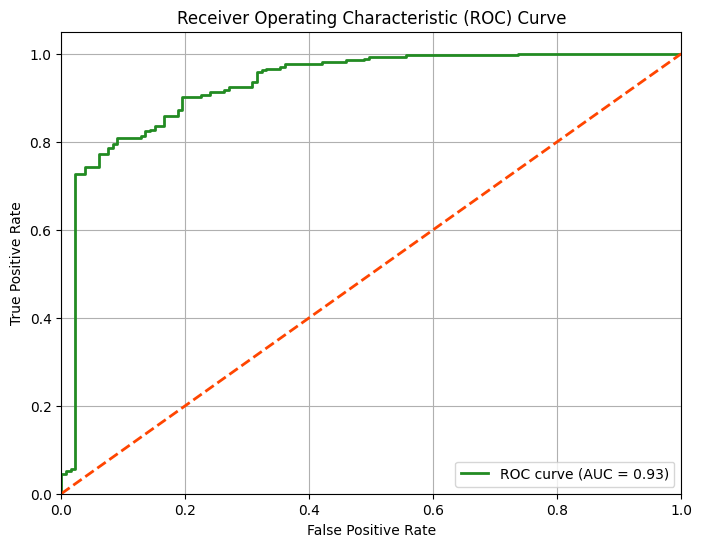

In [25]:
#ROC_curve
from sklearn.metrics import roc_curve
y_scores = svm_model.decision_function(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_scores)
roc_auc = roc_auc_score(y_test,y_scores)

#Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='forestgreen',lw=2,label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orangered', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

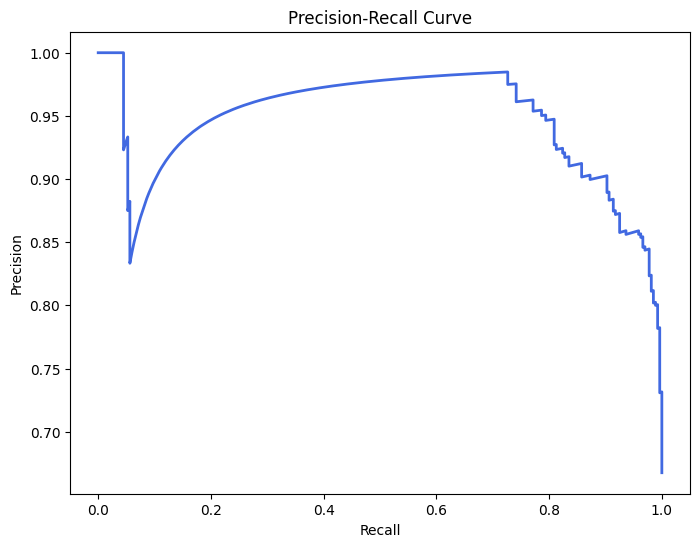

In [26]:
#Precision and recall curve
from sklearn.metrics import precision_recall_curve
precision,recall,_ = precision_recall_curve(y_test,y_scores)

#Plotting precision and recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall,precision,color='royalblue',lw=2,label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

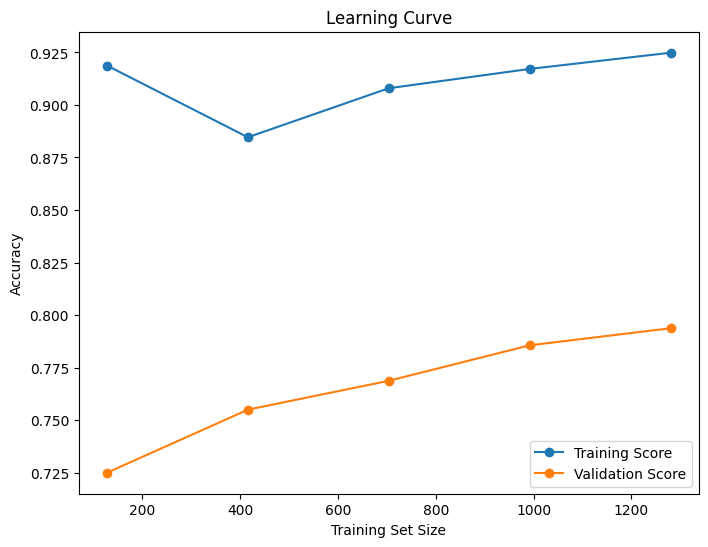

In [27]:
#Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(estimator=svm_model,X=X_train,y=y_train,cv=5,scoring='accuracy')

#Calculating mean of train and test
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(val_scores,axis=1)


#Plotting learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### **Optimization Of The Model**

In [28]:
#Optimizing the model by Hyperparameter tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Hyperparameter grid
param_grid = {
       'C': [ 0.01, 0.1, 1,5, 10,50, 100],
       'gamma': ['scale', 'auto', 0.01, 0.1,0.5,0.9, 1,5, 10],
       'kernel': ['rbf']
   }

#Initializing SVM with class balancing
svm_model = SVC(class_weight='balanced',random_state=42)

#Grid Search for best parameters
grids_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grids_svm.fit(X_train, y_train)

#Getting the best model
best_svm = grids_svm.best_estimator_

#Predicting on test data
y_pred_best = best_svm.predict(X_test)

#Evaluation of the best SVM model
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best, zero_division=1)
roc_auc = roc_auc_score(y_test, y_pred_best)
logloss = log_loss(y_test, y_pred_best)

#Printing  results
print("Best Parameters:", grids_svm.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)
print("Log Loss:", logloss)

Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy: 0.885
Confusion Matrix:
 [[ 87  46]
 [  0 267]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

ROC AUC Score: 0.8270676691729324
Log Loss: 4.145020139748473


## **Comparison And Analysis**

### **Comparison of SVM Performance with Different Kernels**
---

|Kernel	|Best Parameters	|Accuracy	|Precision (Class 1)|	Recall (Class 1)|	F1-Score (Class 1)	|ROC AUC Score |	Log Loss |
|-----------------------||||||||
|RBF	|C=1, gamma=0.5|	0.885|	0.85|	1.00|	0.92|	0.828|	4.13|
|Polynomial|	C=0.1, gamma=0.1	|0.8675	|0.90	|0.91|	0.90|	0.848	|4.77|

**=> <u>Observations</u>**

Radial Basis Function (RBF) Kernel:

- Achieves the highest accuracy (88.55%) and sas the highest recall (100%) for Class 1, meaning it identifies almost all positive cases correctly.
- However, its ROC AUC score (0.828) is slightly lower than the polynomial kernel.
- Log Loss is the lowest (4.13), indicating a better probabilistic confidence in predictions.

**<u>Polynomial Kernel</u>**

- Has slightly lower accuracy (86.75%)and achieves higher precision (90%) for Class 1, meaning it makes fewer false positive predictions.
- Has a higher ROC AUC Score (0.848) than RBF, suggesting better overall model performance.
- Log Loss is slightly higher (4.77), indicating slightly less confident probability predictions than RBF.

**<u>Better Kernel In Different Aspects</u>**
- If it means prioritizing recall which is minimizing false negatives, i.e., ensuring all poisonous mushrooms should be identified then RBF is better than polynomial.
- If we have to prioritize precision in  making sure mushrooms classified as poisonous truly are(reducing false positives) that makes polynomial is better.
- If ROC AUC is the main criterion, Polynomial slightly outperforms RBF and RBF kernel is generally preferred as it provides a balanced high accuracy and better recall.

---

### **SVM Strengths and Weaknesses for the Mushroom Dataset Based on EDA and Visualization**
---

> **Strengths of SVM for the Mushroom Dataset**

**=> <u>Handles High-Dimensional Data Well</u>**

- The mushroom dataset contains many categorical features that have been converted into numerical representations through one-hot encoding.
- SVM is effective for high-dimensional spaces, making it a good fit for such categorical data.

**=> <u>Effective for Non-Linearly Separable Data</u>**

- From the violin plots, we can see that many features overlap, meaning the decision boundary is not linearly separable.
- Kernelized SVM (such RBF, polynomial kernels) can capture complex decision boundaries and improve classification performance.

**=> <u>Powerful Against Overfitting (With Proper Regularization)</u>**

- The SVM uses margin maximization, reducing the risk of overfitting, especially with a well-chosen kernel and regularization parameter (C).
- This is beneficial given the imbalance in class distribution (poisonous vs. edible).

**=> <u>Handles Outliers with Soft Margin SVM</u>**

- Some feature distributions (e.g., stalk_root, odor) show a few distinct outliers.
Soft margin SVM (with adjustable C parameter) allows some misclassification to maintain generalization.

> **Weaknesses of SVM for the Mushroom Dataset**

**=> <u>Computationally Expensive for Large Datasets</u>**

- The dataset has a large number of samples and features (after encoding categorical variables), SVM can be computationally expensive compared to tree-based models like Random Forest.
- Training time increases significantly with large datasets, especially for non-linear kernels.

**=> <u>Feature Scaling Required for Optimal Performance</u>**

- The dataset contains categorical data that has been encoded into numerical values.
- SVM is sensitive to feature scales, meaning that feature scaling (e.g., StandardScaler or MinMaxScaler) is required for optimal performance, especially for RBF kernels.

**=> <u>Does Not Handle Missing Data Well</u>**

- If there are any missing values exist in the dataset, SVM does not have built-in mechanisms like tree-based models to handle them.
- Data preprocessing is essential before applying SVM.

**=> <u>Difficult to Interpret</u>**

- The SVM is not as interpretable as decision trees or logistic regression.
- Since explainability is important in identifying which mushroom characteristics contribute most to toxicity, SVM may not be the best choice.


---

### **Practical Implications of SVM in Real-world Classification Tasks**
---

Support Vector Machines (SVM) are widely used in real-world classification tasks due to their ability to handle high-dimensionality in data, robustness to overfitting, and effectiveness in non-linearly separable problems.

 Here are some key practical implications of SVM in different domains:

**=> <u>Medical Diagnosis & Healthcare</u>**

- In Disease Classification: SVMs are used to classify diseases like cancer (example breast cancer detection using histopathological images) and heart disease prediction.
- In Medical Image Analysis: Helps in segmenting and classifying MRI and CT scan images for detecting tumors or abnormalities.
- In Gene Expression Analysis: Used in bioinformatics for classifying gene expressions and identifying disease patterns.

**=> <u>Text & Sentiment Analysis</u>**
- In Spam Detection: Email services use SVM to classify emails as spam or non-spam based on textual features.
- In Sentiment Analysis: Used in NLP to classify customer reviews as positive, negative, or neutral.
- In Classification of Documents : SVM helps in categorizing documents into predefined categories, such as news classification or legal document sorting.

**=> <u>Financial & Fraud Detection</u>**
- In Credit Risk Assessment: Banks and financial institutions use SVM to classify loan applicants as low-risk or high-risk based on financial history.
- In Detecting Fraud : Helps detect fraudulent transactions in banking by classifying suspicious vs. legitimate transactions.

**=> <u>Image & Face Recognition</u>**
- Face Detection: SVMs are used in security systems to detect and classify faces in images.
- Handwriting Recognition: Used in digit recognition tasks, such as postal code reading in mail sorting.
- Object Recognition: Helps in self-driving cars to classify road signs, pedestrians, and vehicles.

**=> <u>Industrial & Engineering Applications</u>**
- Product Fault Detection: Used in manufacturing to detect faulty products on assembly lines.
- Poduct Quality Control: Classifies products based on defects using image processing.
- Cybersecurity: Used in intrusion detection systems (IDS) to classify network traffic as normal or malicious.

**Challenges & Limitations of SVMs**

- Scalability: SVMs can be computationally expensive for very large datasets.
- Parameter Tuning: Choosing the right kernel and hyperparameters (C, gamma) is critical for performance.
- Interpretability: SVM models, especially with non-linear kernels, are less interpretable compared to decision trees.

> **Conclusion**

SVMs are highly effective in various classification tasks, especially when dealing with complex decision boundaries. However, they require careful tuning and may not always be the best choice for large-scale datasets compared to deep learning or ensemble methods.